In [1]:
import pandas 
import numpy as np

data = pandas.read_csv("/content/drive/MyDrive/UCL/GRAD_RATE_AND_OUTCOMES_2020.csv")
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,report_school_year,aggregation_index,aggregation_type,aggregation_code,aggregation_name,entity_inactive_date,lea_beds,lea_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,boces_code,boces_name,membership_code,membership_key,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2019-20,0,Statewide,0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,152,2014 Total Cohort - 6 Year Outcome,1,All Students,210130,182402,87%,14679,7%,96936,46%,70787,34%,2577,1%,4911,2%,1579,1%,18517,9%
1,2019-20,0,Statewide,0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,152,2014 Total Cohort - 6 Year Outcome,2,Female,102363,91909,90%,6375,6%,47103,46%,38431,38%,863,1%,1757,2%,600,1%,7192,7%
2,2019-20,0,Statewide,0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,152,2014 Total Cohort - 6 Year Outcome,3,Male,107767,90493,84%,8304,8%,49833,46%,32356,30%,1714,2%,3154,3%,979,1%,11325,11%
3,2019-20,0,Statewide,0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,152,2014 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,1327,1018,77%,102,8%,658,50%,258,19%,21,2%,55,4%,17,1%,215,16%
4,2019-20,0,Statewide,0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,152,2014 Total Cohort - 6 Year Outcome,5,Black,37070,29969,81%,4263,11%,21253,57%,4453,12%,596,2%,1419,4%,393,1%,4658,13%


In [2]:
county_data = data.loc[data['aggregation_type'] == 'County']
county_data = county_data.loc[county_data['subgroup_name'] == 'All Students']
county_data = county_data.loc[county_data['membership_desc'] == '2016 Total Cohort - 4 Year Outcome']
county_data

,report_school_year,aggregation_index,aggregation_type,aggregation_code,aggregation_name,entity_inactive_date,lea_beds,lea_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,boces_code,boces_name,membership_code,membership_key,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
1180,2019-20,2,County,10000000000,County: ALBANY,NaN,NaN,NaN,NaN,NaN,1.0,ALBANY,0.0,NaN,NaN,9,154,2016 Total Cohort - 4 Year Outcome,1,All Students,3117,2712,87%,92,3%,1126,36%,1494,48%,23,1%,196,6%,9,0%,177,6%
1315,2019-20,2,County,20000000000,County: ALLEGANY,NaN,NaN,NaN,NaN,NaN,2.0,ALLEGANY,0.0,NaN,NaN,9,154,2016 Total Cohort - 4 Year Outcome,1,All Students,505,447,89%,35,7%,260,51%,152,30%,13,3%,15,3%,3,1%,25,5%
1442,2019-20,2,County,30000000000,County: BROOME,NaN,NaN,NaN,NaN,NaN,3.0,BROOME,0.0,NaN,NaN,9,154,2016 Total Cohort - 4 Year Outcome,1,All Students,2033,1744,86%,127,6%,847,42%,770,38%,35,2%,91,4%,28,1%,135,7%
1580,2019-20,2,County,40000000000,County: CATTARAUGUS,NaN,NaN,NaN,NaN,NaN,4.0,CATTARAUGUS,0.0,NaN,NaN,9,154,2016 Total Cohort - 4 Year Outcome,1,All Students,994,852,86%,43,4%,460,46%,349,35%,20,2%,47,5%,8,1%,66,7%
1710,2019-20,2,County,50000000000,County: CAYUGA,NaN,NaN,NaN,NaN,NaN,5.0,CAYUGA,0.0,NaN,NaN,9,154,2016 Total Cohort - 4 Year Outcome,1,All Students,777,626,81%,28,4%,298,38%,300,39%,25,3%,45,6%,21,3%,60,8%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8706,2019-20,2,County,640000000000,County: WASHINGTON,NaN,NaN,NaN,NaN,NaN,64.0,WASHINGTON,0.0,NaN,NaN,9,154,2016 Total Cohort - 4 Year Outcome,1,All Students,656,533,81%,31,5%,270,41%,232,35%,10,2%,37,6%,7,1%,68,10%
8837,2019-20,2,County,650000000000,County: WAYNE,NaN,NaN,NaN,NaN,NaN,65.0,WAYNE,0.0,NaN,NaN,9,154,2016 Total Cohort - 4 Year Outcome,1,All Students,1026,899,88%,63,6%,416,41%,420,41%,7,1%,48,5%,0,0%,70,7%
8968,2019-20,2,County,660000000000,County: WESTCHESTER,NaN,NaN,NaN,NaN,NaN,66.0,WESTCHESTER,0.0,NaN,NaN,9,154,2016 Total Cohort - 4 Year Outcome,1,All Students,11460,10203,89%,262,2%,7600,66%,2341,20%,25,0%,893,8%,55,0%,284,2%
9102,2019-20,2,County,670000000000,County: WYOMING,NaN,NaN,NaN,NaN,NaN,67.0,WYOMING,0.0,NaN,NaN,9,154,2016 Total Cohort - 4 Year Outcome,1,All Students,330,304,92%,19,6%,169,51%,116,35%,3,1%,14,4%,0,0%,9,3%


Mean:  86.16129032258064
Median:  87.0
Stdev:  4.372767996031565


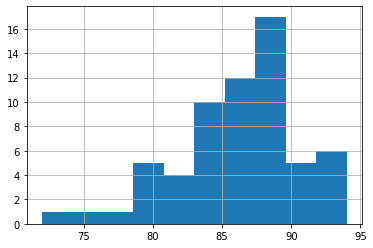

In [3]:
grade_no_pct = county_data['grad_pct'].str.replace('%', '').astype(int)
grade_no_pct.hist()
print('Mean: ', grade_no_pct.mean())
print('Median: ', grade_no_pct.median())
print('Stdev: ', grade_no_pct.std())

In [4]:
import pandas 

data2 = pandas.read_csv("/content/drive/MyDrive/UCL/GRAD_RATE_AND_OUTCOMES_2019.csv")
data2.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,report_school_year,aggregation_index,aggregation_type,aggregation_code,aggregation_name,entity_inactive_date,lea_beds,lea_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,boces_code,boces_name,membership_code,membership_key,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,0,Statewide,0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,138,2013 Total Cohort - 6 Year Outcome,1,All Students,206486,177940,86%,13372,6%,96237,47%,68331,33%,2756,1%,5417,3%,1374,1%,18866,9%
1,2018-19,0,Statewide,0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,138,2013 Total Cohort - 6 Year Outcome,2,Female,100118,89170,89%,5828,6%,46361,46%,36981,37%,909,1%,2006,2%,541,1%,7442,7%
2,2018-19,0,Statewide,0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,138,2013 Total Cohort - 6 Year Outcome,3,Male,106368,88770,83%,7544,7%,49876,47%,31350,29%,1847,2%,3411,3%,833,1%,11424,11%
3,2018-19,0,Statewide,0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,138,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,1255,952,76%,98,8%,626,50%,228,18%,26,2%,49,4%,17,1%,209,17%
4,2018-19,0,Statewide,0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,138,2013 Total Cohort - 6 Year Outcome,5,Black,37080,29662,80%,3931,11%,21402,58%,4329,12%,633,2%,1567,4%,342,1%,4851,13%


In [5]:
county_data2 = data2.loc[data2['aggregation_type'] == 'County']
county_data2 = county_data2.loc[county_data2['subgroup_name'] == 'All Students']
county_data2 = county_data2.loc[county_data2['membership_desc'] == '2015 Total Cohort - 4 Year Outcome']


Mean:  83.6774193548387
Median:  84.0
Stdev: 5.165377149826246


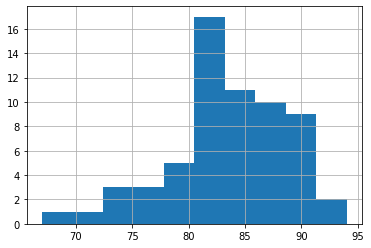

In [6]:
grade_no_pct2 = county_data2['grad_pct'].str.replace('%', '').astype(int)

grade_no_pct2.hist()
print('Mean: ', grade_no_pct2.mean())
print('Median: ', grade_no_pct2.median())
print('Stdev:', grade_no_pct2.std())

The CLES is: 0.3197190426638918


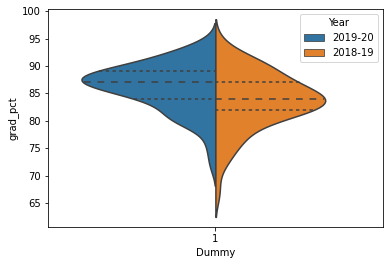

In [7]:
# violin plot to look at the difference in grad percentage from 2019 to 2020. 
import seaborn

grade_no_pct2 = county_data2['grad_pct'].str.replace('%', '').astype(int)
grade_no_pct = county_data['grad_pct'].str.replace('%', '').astype(int)

# effect size in CLES by comparing all elements with one another
g = 0
t = 0
for x in grade_no_pct2:
    for y in grade_no_pct:
        if x > y:
            g+=1
        t+=1
cles = g/t
print(f"The CLES is: {cles}")

comparision1 = pandas.DataFrame()
comparision2 = pandas.DataFrame()
comparision = pandas.DataFrame()
comparision1.insert(0, "County", county_data["county_name"], True)
comparision1.insert(1, "Year", county_data['report_school_year'], True)
comparision1.insert(2, "grad_pct", grade_no_pct, True)
#comparision1
comparision2.insert(0, "County", county_data2["county_name"], True)
comparision2.insert(1, "Year", county_data2['report_school_year'], True)
comparision2.insert(2, "grad_pct", grade_no_pct2, True)
#comparision2

comparision = pandas.concat([comparision1, comparision2])

comparision['Dummy'] = [1]*len(comparision.index)
#comparision
seaborn.violinplot(data = comparision, x = 'Dummy', y = 'grad_pct', hue = 'Year', split = True, inner = 'quartile')


In [8]:
from scipy import stats
stats.ttest_ind(grade_no_pct, grade_no_pct2)
print(stats.ttest_ind(grade_no_pct, grade_no_pct2))

Ttest_indResult(statistic=2.8898919609759997, pvalue=0.0045624865991338815)


# Analysis Income and Graduation rates 

In [9]:
import pandas
import numpy as np
data_income = pandas.read_csv("/content/drive/MyDrive/QM2 /Income-county-data.csv")
data_income.head()

,COUNTY,"Median household income (in 2019 dollars), 2015-2019"
0,Albany,66252
1,Allegany,48412
2,Bronx,40088
3,Broome,52226
4,Cattaraugus,48703


In [10]:
data_income.shape
summary_data_income = data_income["Median household income (in 2019 dollars), 2015-2019"].describe()
summary_data_income

count        62.000000
mean      63400.741935
std       16035.986493
min       40088.000000
25%       54152.000000
50%       58086.500000
75%       65360.250000
max      116100.000000
Name: Median household income (in 2019 dollars), 2015-2019, dtype: float64

In [11]:
median_income = data_income['Median household income (in 2019 dollars), 2015-2019'].astype(float)

# First quartile (Q1)
Q1 = np.quantile(data_income['Median household income (in 2019 dollars), 2015-2019'], 0.25)
print(Q1)
  
# Third quartile (Q3)
Q3 = np.quantile(data_income['Median household income (in 2019 dollars), 2015-2019'], 0.75)
print(Q3)

54152.0
65360.25


In [12]:

low_income_data = data_income.loc[data_income['Median household income (in 2019 dollars), 2015-2019'] <= 54152.0]
print(low_income_data)
print("Length: ",len(low_income_data))
high_income_data = data_income.loc[data_income['Median household income (in 2019 dollars), 2015-2019'] >= 65360.25]
print(high_income_data)
print("Length: ",len(high_income_data))


          COUNTY  Median household income (in 2019 dollars), 2015-2019
1      Allegany                                               48412   
2         Bronx                                               40088   
3         Broome                                              52226   
4   Cattaraugus                                               48703   
6    Chautauqua                                               46820   
8      Chenango                                               52002   
12     Delaware                                               49544   
16     Franklin                                               50407   
17       Fulton                                               50482   
19       Greene                                               53601   
22    Jefferson                                               52685   
28   Montgomery                                               49462   
36      Orleans                                               52620   
38    

In [13]:
# list county for 2020 + make it a list 
list_of_county = county_data2['aggregation_name'].to_list()

new_list_county_20 = [s.replace("County: ", "") for s in list_of_county]

# list county 2019 
list_county_19 = county_data['aggregation_name'].to_list()

new_list_county_19 = [s.replace("County: ", "") for s in list_county_19]

# list low and high income 
low_income_list_19 = low_income_data['COUNTY'].to_list()
county_low_income_list_19 = low_income_list_19 = [s.replace(" ", "") for s in low_income_list_19]

high_income_list_19 = high_income_data['COUNTY'].to_list()
county_high_income_list_19 = [s.replace(" ", "") for s in high_income_list_19]

# NEW LOWER CASE LIST TO USE 
# put every list lower case
low_income_19 = [each_string.lower() for each_string in county_low_income_list_19]

high_income_19 =[each_string.lower() for each_string in county_high_income_list_19]

county_19 = [each_string.lower() for each_string in new_list_county_19]
county_20 = [each_string.lower() for each_string in new_list_county_20] 

# list of Q1 2019 
new_list = []
for county in county_19:
    if county in low_income_19:
        new_list.append(county)
# list of Q1 2020 
new_list_20 = []
for county in county_20:
    if county in low_income_19:
        new_list_20.append(county)

# dataframe 2019 with Q1 county 
clean_county_data2 = county_data2.replace("County: ", "", regex = True)
clean_county_data2['aggregation_name'] = clean_county_data2['aggregation_name'].str.lower()

df_poor = pandas.DataFrame(new_list, columns = ['aggregation_name'])

df_joined_Q1 = df_poor.merge(clean_county_data2, left_on = 'aggregation_name', right_on = 'aggregation_name', how = 'left')

# dataframe 2020 with Q1 county 
clean_county_data_20 = county_data.replace("County: ", "", regex = True)
clean_county_data_20['aggregation_name'] = clean_county_data_20['aggregation_name'].str.lower()

df_poor_20 = pandas.DataFrame(new_list_20, columns = ['aggregation_name'])
df_poor_20

df_joined_Q1_20 = df_poor_20.merge(clean_county_data_20, left_on = 'aggregation_name', right_on = 'aggregation_name', how = 'left')
df_joined_Q1_20
                                                

,aggregation_name,report_school_year,aggregation_index,aggregation_type,aggregation_code,entity_inactive_date,lea_beds,lea_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,boces_code,boces_name,membership_code,membership_key,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,allegany,2019-20,2,County,20000000000,NaN,NaN,NaN,NaN,NaN,2.0,ALLEGANY,0.0,NaN,NaN,9,154,2016 Total Cohort - 4 Year Outcome,1,All Students,505,447,89%,35,7%,260,51%,152,30%,13,3%,15,3%,3,1%,25,5%
1,broome,2019-20,2,County,30000000000,NaN,NaN,NaN,NaN,NaN,3.0,BROOME,0.0,NaN,NaN,9,154,2016 Total Cohort - 4 Year Outcome,1,All Students,2033,1744,86%,127,6%,847,42%,770,38%,35,2%,91,4%,28,1%,135,7%
2,cattaraugus,2019-20,2,County,40000000000,NaN,NaN,NaN,NaN,NaN,4.0,CATTARAUGUS,0.0,NaN,NaN,9,154,2016 Total Cohort - 4 Year Outcome,1,All Students,994,852,86%,43,4%,460,46%,349,35%,20,2%,47,5%,8,1%,66,7%
3,chautauqua,2019-20,2,County,60000000000,NaN,NaN,NaN,NaN,NaN,6.0,CHAUTAUQUA,0.0,NaN,NaN,9,154,2016 Total Cohort - 4 Year Outcome,1,All Students,1529,1275,83%,88,6%,670,44%,517,34%,20,1%,102,7%,3,0%,128,8%
4,chenango,2019-20,2,County,80000000000,NaN,NaN,NaN,NaN,NaN,8.0,CHENANGO,0.0,NaN,NaN,9,154,2016 Total Cohort - 4 Year Outcome,1,All Students,552,487,88%,49,9%,269,49%,169,31%,11,2%,24,4%,7,1%,21,4%
5,delaware,2019-20,2,County,120000000000,NaN,NaN,NaN,NaN,NaN,12.0,DELAWARE,0.0,NaN,NaN,9,154,2016 Total Cohort - 4 Year Outcome,1,All Students,396,336,85%,23,6%,208,53%,105,27%,1,0%,40,10%,0,0%,18,5%
6,franklin,2019-20,2,County,160000000000,NaN,NaN,NaN,NaN,NaN,16.0,FRANKLIN,0.0,NaN,NaN,9,154,2016 Total Cohort - 4 Year Outcome,1,All Students,510,449,88%,51,10%,211,41%,187,37%,13,3%,25,5%,0,0%,22,4%
7,fulton,2019-20,2,County,170000000000,NaN,NaN,NaN,NaN,NaN,17.0,FULTON,0.0,NaN,NaN,9,154,2016 Total Cohort - 4 Year Outcome,1,All Students,614,490,80%,31,5%,257,42%,202,33%,12,2%,51,8%,0,0%,54,9%
8,greene,2019-20,2,County,190000000000,NaN,NaN,NaN,NaN,NaN,19.0,GREENE,0.0,NaN,NaN,9,154,2016 Total Cohort - 4 Year Outcome,1,All Students,447,392,88%,23,5%,209,47%,160,36%,6,1%,25,6%,4,1%,20,4%
9,jefferson,2019-20,2,County,220000000000,NaN,NaN,NaN,NaN,NaN,22.0,JEFFERSON,0.0,NaN,NaN,9,154,2016 Total Cohort - 4 Year Outcome,1,All Students,1174,1014,86%,59,5%,494,42%,461,39%,15,1%,59,5%,8,1%,77,7%


In [14]:
differenceQ1 = []
df_joined_Q1_20['grad_pct'] = df_joined_Q1_20['grad_pct'].astype(str).str.replace('%', '').astype(float)
print(len(df_joined_Q1))
df_joined_Q1['grad_pct'] = df_joined_Q1['grad_pct'].astype(str).str.replace('%', '').astype(float)
print(len(df_joined_Q1_20))

for i in range (0, len(df_joined_Q1_20)):
  
  difference_Q1 = df_joined_Q1_20['grad_pct'].iloc[i] - df_joined_Q1['grad_pct'].iloc[i]
  differenceQ1.append(difference_Q1)

print(differenceQ1)


16
16
[2.0, 3.0, -1.0, 1.0, 7.0, 5.0, 3.0, 3.0, 5.0, 3.0, 10.0, 5.0, 2.0, 10.0, 0.0, 3.0]


Almost every low income county's average graduation rate increases. It's very weird. 
Graduation doesn't tell you about the learning loss.

In [15]:
from statistics import mean
from statistics import median
from statistics import stdev
print('Mean: ', mean(differenceQ1))
print('Median: ', median(differenceQ1))
print('Stdev: ', stdev(differenceQ1))

Mean:  3.8125
Median:  3.0
Stdev:  3.1244999599935985


In [16]:
# Q3 2019 
new_listQ3 = []
for county in county_19:
    if county in high_income_19:
        new_listQ3.append(county)
print(new_listQ3)

# Q3 2020 
new_list_20_Q3 = []
for county in county_20:
    if county in high_income_19:
        new_list_20_Q3.append(county)
print(new_list_20_Q3)

# dataframe 2019 with Q3 county 
clean_county_data2_rich = county_data2.replace("County: ", "", regex = True)
clean_county_data2['aggregation_name'] = clean_county_data2['aggregation_name'].str.lower()

df_rich = pandas.DataFrame(new_listQ3, columns = ['aggregation_name'])

df_joined_Q3 = df_rich.merge(clean_county_data2_rich, left_on = 'aggregation_name', right_on = 'aggregation_name', how = 'left')

# dataframe 2020 with Q3 county 
clean_county_data_20_Q3 = county_data.replace("County: ", "", regex = True)
clean_county_data_20_Q3['aggregation_name'] = clean_county_data_20_Q3['aggregation_name'].str.lower()

df_rich_20 = pandas.DataFrame(new_list_20_Q3, columns = ['aggregation_name'])
df_rich_20

df_joined_Q3_20 = df_rich_20.merge(clean_county_data_20_Q3, left_on = 'aggregation_name', right_on = 'aggregation_name', how = 'left')
df_joined_Q3_20

# dataframe 2019 with Q3 county 
clean_county_data2 = county_data2.replace("County: ", "", regex = True)
clean_county_data2['aggregation_name'] = clean_county_data2['aggregation_name'].str.lower()

df_rich_19 = pandas.DataFrame(new_listQ3, columns = ['aggregation_name'])

df_joined_Q3 = df_rich_19.merge(clean_county_data2, left_on = 'aggregation_name', right_on = 'aggregation_name', how = 'left')



['albany', 'columbia', 'dutchess', 'nassau', 'queens', 'richmond', 'orange', 'putnam', 'rensselaer', 'rockland', 'saratoga', 'schenectady', 'suffolk', 'westchester']
['albany', 'columbia', 'dutchess', 'nassau', 'queens', 'richmond', 'orange', 'putnam', 'rensselaer', 'rockland', 'saratoga', 'schenectady', 'suffolk', 'westchester']


In [17]:
differenceQ3 = []

df_joined_Q3_20['grad_pct'] = df_joined_Q3_20['grad_pct'].astype(str).str.replace('%', '').astype(float)
df_joined_Q3['grad_pct'] = df_joined_Q3['grad_pct'].astype(str).str.replace('%', '').astype(float)


for i in range (0, len(df_joined_Q3_20)):
  
  difference_Q3 = df_joined_Q3_20['grad_pct'].iloc[i] - df_joined_Q3['grad_pct'].iloc[i]
  differenceQ3.append(difference_Q3)

print(differenceQ3)

[2.0, 1.0, 4.0, 2.0, 3.0, 2.0, 2.0, 1.0, 0.0, 0.0, 1.0, 3.0, 2.0, 1.0]


In [18]:
# analysis mean, median, stdev Q3
from statistics import mean
from statistics import median
from statistics import stdev
print('Mean: ', mean(differenceQ3))
print('Median: ', median(differenceQ3))
print('Stdev: ', stdev(differenceQ3))

Mean:  1.7142857142857142
Median:  2.0
Stdev:  1.1387288073563857


In [19]:
# t-test Q1 and Q3 list 
from scipy import stats
stats.ttest_ind(differenceQ1, differenceQ3)
print(stats.ttest_ind(differenceQ1, differenceQ3))

Ttest_indResult(statistic=2.374139690010609, pvalue=0.024683353211110006)


   Quartile  Difference
0        Q1         2.0
1        Q1         3.0
2        Q1        -1.0
3        Q1         1.0
4        Q1         7.0
5        Q1         5.0
6        Q1         3.0
7        Q1         3.0
8        Q1         5.0
9        Q1         3.0
10       Q1        10.0
11       Q1         5.0
12       Q1         2.0
13       Q1        10.0
14       Q1         0.0
15       Q1         3.0
0        Q3         2.0
1        Q3         1.0
2        Q3         4.0
3        Q3         2.0
4        Q3         3.0
5        Q3         2.0
6        Q3         2.0
7        Q3         1.0
8        Q3         0.0
9        Q3         0.0
10       Q3         1.0
11       Q3         3.0
12       Q3         2.0
13       Q3         1.0


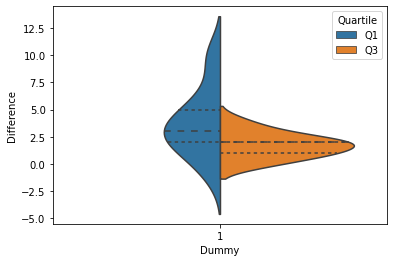

In [20]:
import seaborn

listQ1 = []
for i in range(0, len(differenceQ1)):
  listQ1.append("Q1")

listQ3 = []
for i in range(0, len(differenceQ3)):
  listQ3.append("Q3")

comparisionQ1 = pandas.DataFrame()
comparisionQ3 = pandas.DataFrame()
comparision = pandas.DataFrame()
comparisionQ1.insert(0, "Quartile", listQ1, True)
comparisionQ1.insert(1, "Difference", differenceQ1, True)
comparisionQ1

comparisionQ3.insert(0, "Quartile", listQ3, True)
comparisionQ3.insert(1, "Difference", differenceQ3, True)

comparisionQ3

comparisionQ1Q3 = pandas.concat([comparisionQ1, comparisionQ3])
print(comparisionQ1Q3)

comparisionQ1Q3['Dummy'] = [1]*len(comparisionQ1Q3.index)
comparisionQ1Q3
seaborn.violinplot(data = comparisionQ1Q3, x = 'Dummy', y = 'Difference', hue = 'Quartile', split = True, inner = 'quartile')


the change in graduation rate is more important in low income communities than in high income communities. 

**Methodologies🇰of the comparison of graduation rates and Income from the 2018-2019 school year to the 2019-2020 school year.**

We will look at the comparision between the low income counties and the high income counties and how they performed in the 2018-2019 and 2019-2020 school years because 2019-2020 was the year affected by Covid-19. 

**Graduation percentage data**

First we imported two sets of data from the NY state education website and found the graduation data from the 2018-2019 and 2019-2020 school year. 

We cleaned the two datasets, and started looking for the columns where we could find the graduation percentage, and then refine it to the "all student" categories to get the sum of all the subgroups and then we looked by counties. We also decided to refine the analysis and single out the graduation percentage for only the people that graduated in 4 years which is the traditional time to graduate in the U.S. 

We then decided to find the mean of the graduation percentage for both years and found that it increased from the 2018-2019 school year (83,7%) to 2019-2020 school year (86,2%). 

A vizualisation of the distribution of the graduation percentages of the two data sets was then created. In order to do so, we created two empty data sets that were going to store the graduation percentages for each year and then concatenate them into a third dataframe. We then used the violinplot method to vizualise it. 
We found that the median in higher in 2020 than it was in 2019, which correlates to what we found above. Also, we can extract the following information;in 2019, the value of the lowest quartile is closer in absolute values from the median than the upper quartile. This means that the lowest graduation percentages are condensed under the median and that the best graduation percentages are more scattered. 
It's the opposite for the 2020 dataset. 
An important information as well is that we can see that in 2020, the lowest graduation percentage is almost 5 points of percentage higher than in 2019, meaning that the counties that performed the worst in 2020 did much better than the year before. However, the best graduation percentages didn't change much. 

**Income data from 2015-2019**

It's important to explain that the income data that we found only goes up to 2019. We, thus, kept the same data to compare the low income and high income counties to the change in graduation rates for the 2018-2019 and 2019-2020 school years.

We first calculated the lower and upper quartile of the income dataset to determine the low and high income counties. 

**Income data analysis with the gradution rates**

From that, we looked at the graduation rates for the low and high income counties in 2019 and 2020 and then found the differences in graduation rates for each low and high income counties. 
With these two lists of differences in graduation percentages from low and high income counties for 2018-2019 and 2019-2020, we created a violin plot to vizualise the differences. 

From the violin plot, the main information to remember is that the difference in graduation percentage in low income counties is much more important than in the high income counties. Therefore, we can safely assume that there is a third factor, different than just covid because school closed for the same amount of time to explain the differences in graduation rates. 

